In [1]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
diabetes=datasets.load_diabetes()
df=pd.DataFrame(diabetes.data)
df.head()
diabetes.feature_names
df.columns=diabetes.feature_names


In [3]:
df.insert(0, 'Ones', 1)
# df.head()

In [4]:


from sklearn import cross_validation as cv

X_train, X_test, Y_train, Y_test = cv.train_test_split(df, diabetes.target, test_size=0.2)

C:\Users\Jatin\Anacandoag\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
X_train = np.matrix(X_train)
Y_train = np.matrix(Y_train)
theta2 = np.matrix(np.array([0,0,0,0,0,0,0,0,0,0,0]))
alpha = 0.0001
iters = 1000
theta2
theta2.shape

(1, 11)

In [19]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
#     print(int(theta.ravel().shape[1]))
#     print(int(theta.shape[1]))
#     print(cost)
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost


In [20]:
g2, cost2 = gradientDescent(X_train, Y_train, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X_train, Y_train, g2)


1064113.6073422378

In [10]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

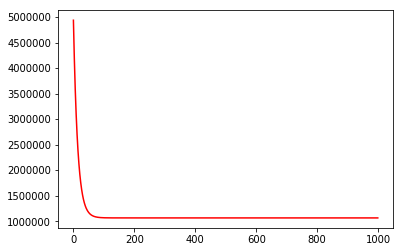

In [21]:

# fig, ax = plt.subplots(2,2,figsize=(6,4))
plt.plot(np.arange(iters), cost2, 'r')

